In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.callbacks.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import adam

In [273]:
XT=pd.read_csv("x_train.csv")
YT=pd.read_csv("y_train.csv")

In [274]:
XT.shape

(1257, 1)

In [275]:
YT.shape

(1257, 1)

In [321]:
Xt=pd.read_csv("x_test.csv")

In [277]:
Xt.shape

(19, 1)

In [278]:
sc=MinMaxScaler(feature_range=(0,1))

In [279]:
XT=sc.fit_transform(XT)
YT=sc.transform(YT)

In [280]:
XT=np.array(XT)

In [281]:
XT=XT.reshape(XT.shape[0],XT.shape[1],1)

In [310]:
model = Sequential()


model.add(LSTM(64,input_shape = (1, 1)))

model.add(Dense(1))


model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics= ['accuracy'])

model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [311]:
checkpoint=ModelCheckpoint("model.h5",monitor='loss',save_best_only=True)

In [312]:
hist=model.fit(XT,YT,epochs=200,callbacks=[checkpoint])

Epoch 1/200
1257/1257 [==============================] - 1s 699us/step - loss: 0.2259 - accuracy: 7.9554e-04
Epoch 2/200
1257/1257 [==============================] - 0s 100us/step - loss: 0.0804 - accuracy: 7.9554e-04
Epoch 3/200
1257/1257 [==============================] - 0s 102us/step - loss: 0.0326 - accuracy: 0.0016
Epoch 4/200
1257/1257 [==============================] - 0s 108us/step - loss: 0.0248 - accuracy: 0.0016
Epoch 5/200
1257/1257 [==============================] - 0s 92us/step - loss: 0.0190 - accuracy: 0.0016
Epoch 6/200
1257/1257 [==============================] - 0s 127us/step - loss: 0.0137 - accuracy: 0.0016
Epoch 7/200
1257/1257 [==============================] - 0s 117us/step - loss: 0.0091 - accuracy: 0.0016
Epoch 8/200
1257/1257 [==============================] - 0s 121us/step - loss: 0.0056 - accuracy: 0.0016
Epoch 9/200
1257/1257 [==============================] - 0s 118us/step - loss: 0.0031 - accuracy: 0.0016
Epoch 10/200
1257/1257 [========================

1257/1257 [==============================] - 0s 130us/step - loss: 2.0660e-04 - accuracy: 0.0016
Epoch 76/200
1257/1257 [==============================] - 0s 127us/step - loss: 2.0440e-04 - accuracy: 0.0016
Epoch 77/200
1257/1257 [==============================] - 0s 118us/step - loss: 2.0606e-04 - accuracy: 0.0016
Epoch 78/200
1257/1257 [==============================] - 0s 121us/step - loss: 2.0912e-04 - accuracy: 0.0016
Epoch 79/200
1257/1257 [==============================] - 0s 127us/step - loss: 2.0293e-04 - accuracy: 0.0016
Epoch 80/200
1257/1257 [==============================] - 0s 124us/step - loss: 2.0626e-04 - accuracy: 0.0016
Epoch 81/200
1257/1257 [==============================] - 0s 130us/step - loss: 2.0287e-04 - accuracy: 0.0016
Epoch 82/200
1257/1257 [==============================] - 0s 118us/step - loss: 2.0553e-04 - accuracy: 0.0016
Epoch 83/200
1257/1257 [==============================] - 0s 118us/step - loss: 2.0379e-04 - accuracy: 0.0016
Epoch 84/200
1257/1257 

1257/1257 [==============================] - 0s 118us/step - loss: 2.0670e-04 - accuracy: 0.0016
Epoch 150/200
1257/1257 [==============================] - 0s 115us/step - loss: 1.9996e-04 - accuracy: 0.0016
Epoch 151/200
1257/1257 [==============================] - 0s 115us/step - loss: 2.0894e-04 - accuracy: 0.0016
Epoch 152/200
1257/1257 [==============================] - 0s 118us/step - loss: 2.0297e-04 - accuracy: 0.0016
Epoch 153/200
1257/1257 [==============================] - 0s 115us/step - loss: 2.0058e-04 - accuracy: 0.0016
Epoch 154/200
1257/1257 [==============================] - 0s 118us/step - loss: 2.0770e-04 - accuracy: 0.0016
Epoch 155/200
1257/1257 [==============================] - 0s 118us/step - loss: 1.9867e-04 - accuracy: 0.0016
Epoch 156/200
1257/1257 [==============================] - 0s 121us/step - loss: 2.0593e-04 - accuracy: 0.0016
Epoch 157/200
1257/1257 [==============================] - 0s 111us/step - loss: 2.0987e-04 - accuracy: 0.0016
Epoch 158/200
1

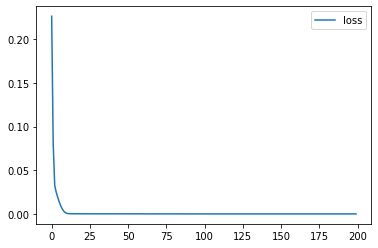

In [313]:
# train_acc=hist.history["accuracy"]
train_loss=hist.history["loss"]
# val_loss=hist.history["val_loss"]
# val_acc=hist.history["val_accuracy"]

# plt.plot(train_acc,label="Acc")
plt.plot(train_loss,label="loss")
# plt.plot(val_loss,label="Val loss")
# plt.plot(val_acc,label="val Acc")

plt.legend()
plt.show()

In [314]:
model.load_weights("model.h5")

In [315]:
model.evaluate(XT,YT)

1257/1257 [==============================] - 1s 550us/step


[0.00020648828722360968, 0.0015910898800939322]

In [322]:
sc1=MinMaxScaler(feature_range=(0,1))

In [323]:
Xt=sc1.fit_transform(Xt)

In [324]:
Xt=np.array(Xt)
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1],1)

In [325]:
Xt.shape

(19, 1, 1)

In [326]:
p=model.predict(Xt)

In [327]:
p=sc1.inverse_transform(p)

In [328]:
p

array([[789.8588 ],
       [791.5417 ],
       [794.64496],
       [808.04865],
       [810.1291 ],
       [809.2846 ],
       [808.2998 ],
       [807.53644],
       [811.38617],
       [807.28534],
       [806.3518 ],
       [809.6364 ],
       [807.05444],
       [821.097  ],
       [826.1498 ],
       [836.01025],
       [838.2238 ],
       [842.1285 ],
       [816.0355 ]], dtype=float32)

In [329]:
p.shape

(19, 1)

In [330]:
pred=pd.DataFrame(p,columns=["High"])

In [331]:
pred

,High
0,789.858826
1,791.541687
2,794.644958
3,808.048645
4,810.129089
5,809.284607
6,808.299805
7,807.536438
8,811.386169
9,807.285339


In [332]:
pred.to_csv("pred.csv",index=False)